In [1]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = VGG19(weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 11s 0us/step


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [4]:
# total_time=[]

In [37]:
# Category = "Men's_Shirts"
# vgg19_feature_list = []
# image_names=[]

# start = time.time()
# path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category
# for img_path in os.listdir(path):
#     if('.DS_Store' not in os.path.join(path,img_path)):
#         image_names.append(img_path)
#         img = image.load_img(os.path.join(path,img_path), target_size=(224, 224))
#         img_data = image.img_to_array(img)
#         img_data = np.expand_dims(img_data, axis=0)
#         img_data = preprocess_input(img_data)
#         vgg19_feature = model.predict(img_data)
#         vgg19_feature_np = np.array(vgg19_feature)
#         vgg19_feature_list.append(vgg19_feature_np.flatten())

# vgg19_feature_list_np = np.array(vgg19_feature_list)
# end = time.time()
# print("Total Time", end - start)

Total Time 790.4999508857727


In [38]:
# total_time.append(end - start)

In [39]:
total_time

[176.73096704483032,
 936.7507922649384,
 2064.1552588939667,
 2008.0159380435944,
 790.4999508857727]

In [40]:
# vgg19_feature_list_np.shape

(1057, 25088)

In [41]:
# vgg19_feature_list_np

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  7.3070664,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  1.1870763,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       , 27.185059 , ...,  0.       ,  8.795731 ,
        15.465015 ]], dtype=float32)

In [42]:
import pickle

pickled_db_path = "features_vgg19/Men's_Shirts.pck"

with open(pickled_db_path, 'wb') as fp:
        pickle.dump(vgg19_feature_list_np, fp)
        print("dumped")
fp.close()

dumped


In [43]:
with open(pickled_db_path, 'rb') as fp:
        #vgg_loaded = pickle.load(fp)
        vgg_loaded = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [44]:
vgg_loaded.shape

(1057, 25088)

In [9]:
# query_image_path = "C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/Chiffon/40632_shop_01.jpg"
query_image_path= "41109_comsumer_14.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
vgg19_feature_query = model.predict(img_dataq)
vgg19_feature_np_query = np.array(vgg19_feature_query)
vgg19_feature_np_query = vgg19_feature_np_query.flatten()

In [10]:
vgg19_feature_np_query.shape

(25088,)

In [11]:
from scipy.spatial import distance

similarity = []
count = 0

for i in vgg_loaded:
    count = count+1
    d = distance.cosine(i,vgg19_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [12]:
similarity

[(0.2968420088291168, '18893_shop_01.jpg'),
 (0.3514590561389923, '18895_shop_01.jpg'),
 (0.26022425293922424, '18896_comsumer_01.jpg'),
 (0.5113285183906555, '18898_shop_01.jpg'),
 (0.26707810163497925, '57423_comsumer_02.jpg')]

In [27]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


C:\Users\SAI SUPRAJA M\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


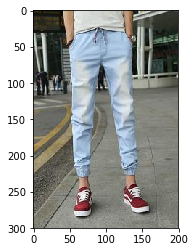

Result images ========================================
similarity 0.5113285183906555


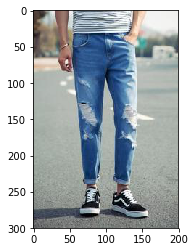

similarity 0.3514590561389923


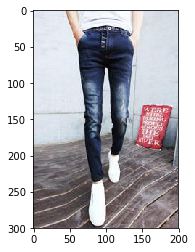

similarity 0.2968420088291168


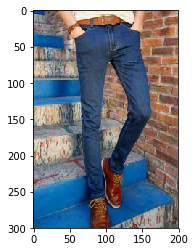

similarity 0.26707810163497925


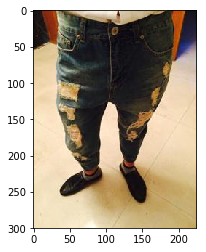

similarity 0.26022425293922424


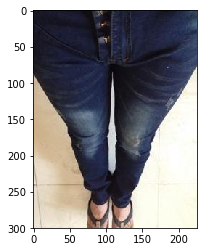

In [32]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:5]
Category = "Jean"
path = 'Men/'+ Category


print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    show_img(path+ "/"+des_similarity[i][1])

In [45]:
total_model_time = 0.0
for i in range(0, len(total_time)):
    total_model_time = total_model_time + total_time[i]

print("total_model_time", total_model_time)

total_model_time 5976.152907133102
